# Zadanie domowe - EDA Danych dotyczących Irysów

* Twoim zadaniem jest wykonanie analizy danych zawartych w załączonym pliku CSV (`25__iris.csv`).
* Plik znajduje się pod video. Pamiętaj, żeby wrzucić plik do tego samego folderu, w którym znajduje się ten notebook.
* Wykorzystaj nowo nabytą wiedzę z biblioteki `Pandas`
* Jeżeli jest taka konieczność posiłkuj się [code explainerem](https://codeexplainer.imprv.ai/) lub / i [data chatterem](https://datachatter.imprv.ai/) (który również te dane ma dostępne).
* Prześlij na discordzie notebook z rozwiązaniem (`#modul-4-zad1`)
* Pamiętaj:

1. Nie spiesz się
2. Potraktuj zadanie domowe jak prawdziwy projekt
3. Dodawaj opisy, obserwacje, wnioski
4. Dodaj wizualizacje
5. Dodaj konkluzję i wnioski końcowe

Powodzenia!!! I mega zabawy!

## O Danych

Zbiór danych zawiera informacje o trzech gatunkach irysów: Iris setosa, Iris versicolor, i Iris virginica.

Dane obejmują pomiary czterech cech: długość i szerokość działki kielicha oraz długość i szerokość płatka.

Każdy wiersz w zbiorze danych reprezentuje pojedynczy kwiat, a wartości pomiarów są podane w centymetrach.

Zbiór składa się z 150 próbek, po 50 dla każdego gatunku, i jest szeroko stosowany jako podstawowy zbiór danych do
testowania algorytmów klasyfikacji oraz w nauce o danych i uczeniu maszynowym.

Kolumny:
* **długość kielicha (sepal length)** - Długość kielicha w cm
* **szerokość kielicha (sepal width)** - Szerokość kielicha w cm
* **długość płatka (petal length)** - Długość płatka w cm
* **szerokość płatka (petal width)** - Szerokość płatka w cm
* **klasa (class)** - Klasa irysa (setosa, versicolor, virginica)
  
    
    

In [203]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [204]:
df = pd.read_csv('25__iris.csv', sep=",")
print("\n\n")

## Prezentacja danych

In [205]:
cm = sns.light_palette("green", as_cmap=True)
#df.style.background_gradient(cmap=cm, axis=1)

### Początkowe wiersze w dataframe

In [206]:
df.head().style.background_gradient(cmap=cm, axis=1)

,długość kielicha (sepal length),szerokość kielicha (sepal width),długość płatka (petal length),szerokość płatka (petal width),klasa (class)
0,5.100000,3.500000,1.400000,0.200000,Iris-setosa
1,4.900000,3.000000,1.400000,0.200000,Iris-setosa
2,4.700000,3.200000,1.300000,0.200000,Iris-setosa
3,4.600000,3.100000,1.500000,0.200000,Iris-setosa
4,5.000000,3.600000,1.400000,0.200000,Iris-setosa


### Losowe wiersze

In [207]:
df.sample(10).style.background_gradient(cmap=cm, axis=1)

,długość kielicha (sepal length),szerokość kielicha (sepal width),długość płatka (petal length),szerokość płatka (petal width),klasa (class)
77,6.700000,3.000000,5.000000,1.700000,Iris-versicolor
81,5.500000,2.400000,3.700000,1.000000,Iris-versicolor
96,5.700000,2.900000,4.200000,1.300000,Iris-versicolor
113,5.700000,2.500000,5.000000,2.000000,Iris-virginica
19,5.100000,3.800000,1.500000,0.300000,Iris-setosa
139,6.900000,3.100000,5.400000,2.100000,Iris-virginica
126,6.200000,2.800000,4.800000,1.800000,Iris-virginica
120,6.900000,3.200000,5.700000,2.300000,Iris-virginica
47,4.600000,3.200000,1.400000,0.200000,Iris-setosa
52,6.900000,3.100000,4.900000,1.500000,Iris-versicolor


### Ostatnie wartości

In [208]:
df.tail().style.background_gradient(cmap=cm, axis=1)

,długość kielicha (sepal length),szerokość kielicha (sepal width),długość płatka (petal length),szerokość płatka (petal width),klasa (class)
145,6.700000,3.000000,5.200000,2.300000,Iris-virginica
146,6.300000,2.500000,5.000000,1.900000,Iris-virginica
147,6.500000,3.000000,5.200000,2.000000,Iris-virginica
148,6.200000,3.400000,5.400000,2.300000,Iris-virginica
149,5.900000,3.000000,5.100000,1.800000,Iris-virginica


## Informacje o kolumnach

In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   długość kielicha (sepal length)   150 non-null    float64
 1   szerokość kielicha (sepal width)  150 non-null    float64
 2   długość płatka (petal length)     150 non-null    float64
 3   szerokość płatka (petal width)    150 non-null    float64
 4   klasa (class)                     150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Zbiorcze informacje o danych
Dane pogrupowane są w pięciu kolumnach, czterech liczbowych i jednej opisowej. 

In [210]:
df.describe().style.background_gradient(cmap=cm, axis=1)

,długość kielicha (sepal length),szerokość kielicha (sepal width),długość płatka (petal length),szerokość płatka (petal width)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [211]:
df.nunique()

długość kielicha (sepal length)     35
szerokość kielicha (sepal width)    23
długość płatka (petal length)       43
szerokość płatka (petal width)      22
klasa (class)                        3
dtype: int64

## Analiza brakujących wartości

In [212]:
df.isnull()

,długość kielicha (sepal length),szerokość kielicha (sepal width),długość płatka (petal length),szerokość płatka (petal width),klasa (class)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [213]:
df.isnull().sum()

długość kielicha (sepal length)     0
szerokość kielicha (sepal width)    0
długość płatka (petal length)       0
szerokość płatka (petal width)      0
klasa (class)                       0
dtype: int64

### Podsumowanie brakujących wartości
Dane są kompletne, nie zawierają braków.

## Analiza pojedynczych zmiennych

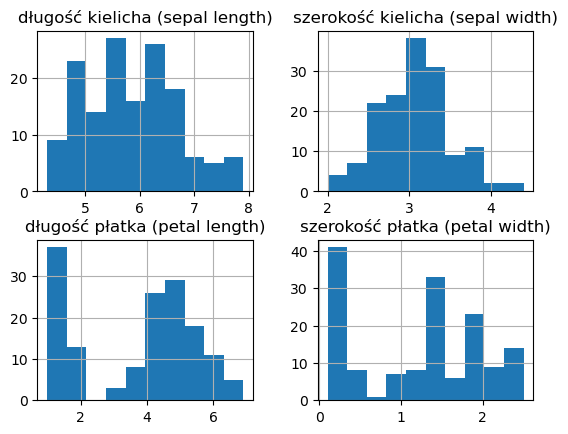

In [214]:
df.hist();

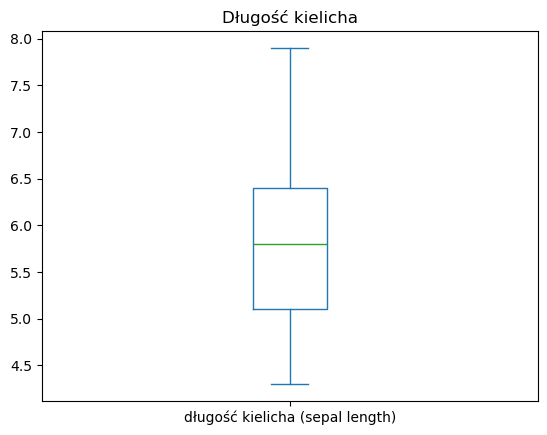

In [215]:
df['długość kielicha (sepal length)'].plot(kind='box', title='Długość kielicha');

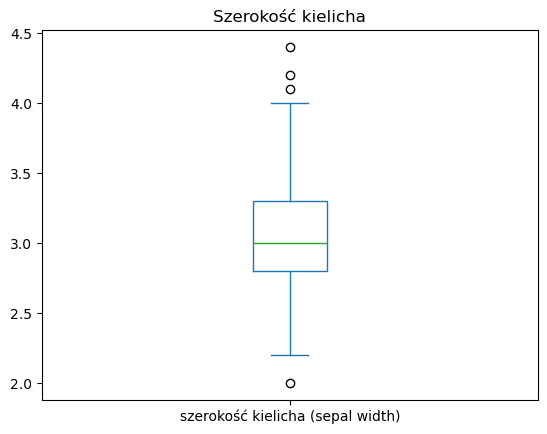

In [216]:
df['szerokość kielicha (sepal width)'].plot(kind='box', title='Szerokość kielicha');

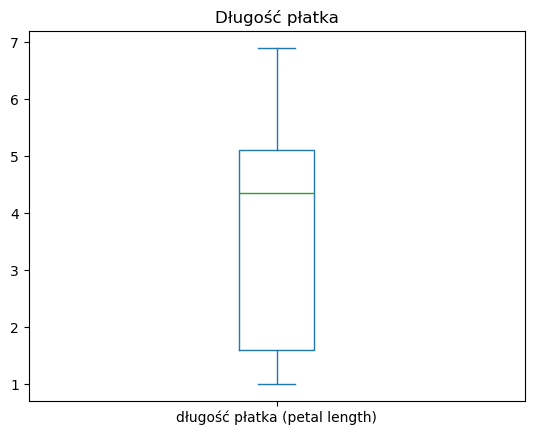

In [217]:
df['długość płatka (petal length)'].plot(kind='box', title='Długość płatka');

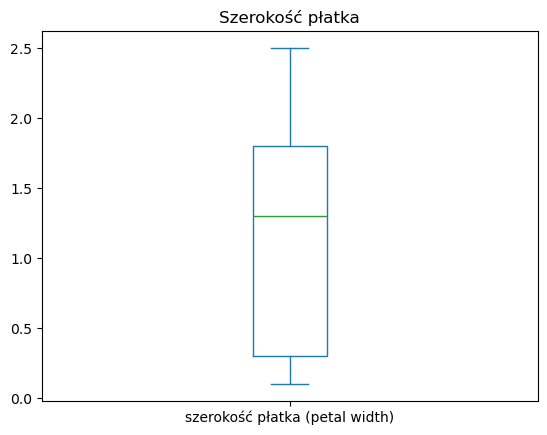

In [218]:
df['szerokość płatka (petal width)'].plot(kind='box', title='Szerokość płatka');

## Analiza zależności pomiędzy zmiennymi
### Długość kielicha, a klasa irysa

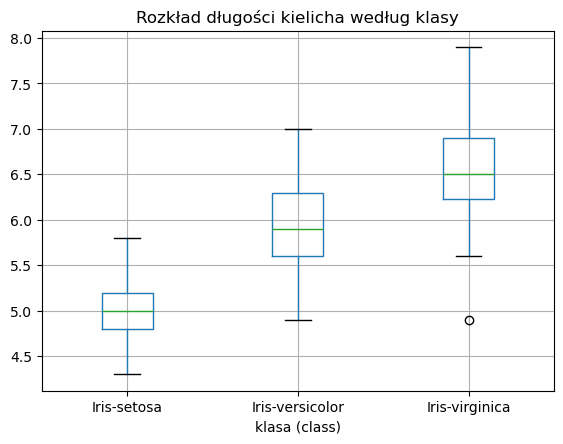

In [219]:
ax = df.boxplot(column='długość kielicha (sepal length)', by='klasa (class)')
plt.suptitle("")
ax.set_title("Rozkład długości kielicha według klasy");

In [220]:
df.groupby('klasa (class)', as_index=False).agg({'długość kielicha (sepal length)': ['min', 'mean', 'median', 'max', 'std', 'count']}).style.background_gradient(cmap=cm, axis=1)

### Szerokość kielicha, a klasa irysa

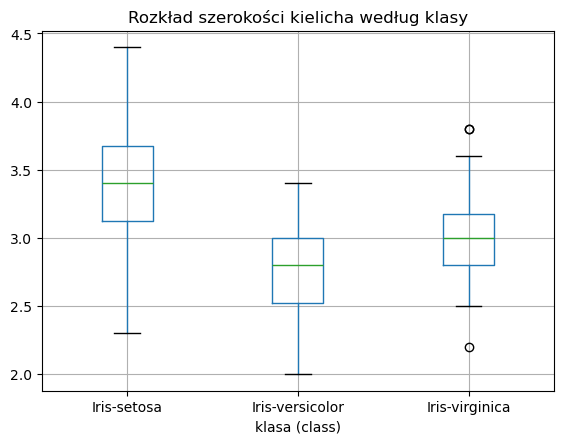

In [221]:
ax1 = df.boxplot(column='szerokość kielicha (sepal width)', by='klasa (class)');
plt.suptitle("")
ax1.set_title("Rozkład szerokości kielicha według klasy");

In [222]:
df.groupby('klasa (class)', as_index=False).agg({'szerokość kielicha (sepal width)': ['min', 'mean', 'median', 'max', 'std', 'count']}).style.background_gradient(cmap=cm, axis=1)

### Długość płatka, a klasa irysa

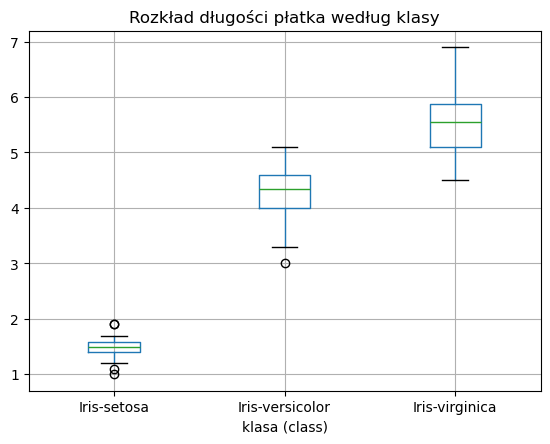

In [223]:

ax = df.boxplot(column='długość płatka (petal length)', by='klasa (class)')
plt.suptitle("")
ax.set_title("Rozkład długości płatka według klasy");

In [224]:
df.groupby('klasa (class)', as_index=False).agg({'długość płatka (petal length)': ['min', 'mean', 'median', 'max', 'std', 'count']}).style.background_gradient(cmap=cm, axis=1)

### Szerokość płatka, a klasa irysa

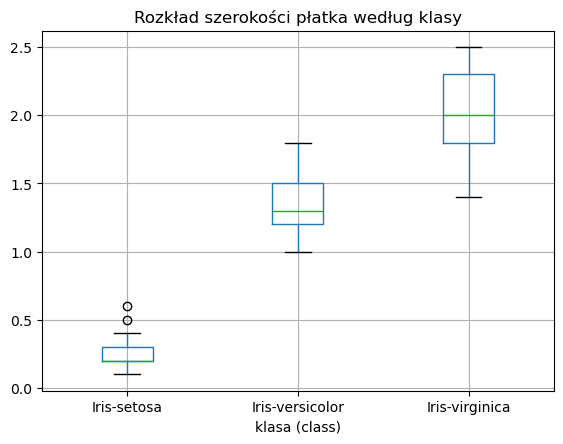

In [225]:
ax5 = df.boxplot(column='szerokość płatka (petal width)', by='klasa (class)');
plt.suptitle("")
ax5.set_title("Rozkład szerokości płatka według klasy");

In [226]:
df.groupby('klasa (class)', as_index=False).agg({'szerokość płatka (petal width)': ['min', 'mean', 'median', 'max', 'std', 'count']}).style.background_gradient(cmap=cm, axis=1)

## Analiza zależności

In [227]:
df[["długość kielicha (sepal length)", "szerokość kielicha (sepal width)", "długość płatka (petal length)", "szerokość płatka (petal width)"]].corr().style.background_gradient(cmap=cm, axis=1)

,długość kielicha (sepal length),szerokość kielicha (sepal width),długość płatka (petal length),szerokość płatka (petal width)
długość kielicha (sepal length),1.000000,-0.109369,0.871754,0.817954
szerokość kielicha (sepal width),-0.109369,1.000000,-0.420516,-0.356544
długość płatka (petal length),0.871754,-0.420516,1.000000,0.962757
szerokość płatka (petal width),0.817954,-0.356544,0.962757,1.000000


## Wnioski
W wyniku analizy danych otrzymaliśmy następujące dane:
1. Iris-setosa mają:
- najkrótsze łodygi z badanych gatunków irysów
- najmniejszą rozpiętość długości łodyg
- łodygi o średniej długości 5cm
- najszersze kielichy  z badanych gatunków irysów
- kielichy o średniej szerokości 3,4cm
- najkrótsze płatki z badanych gatunków irysów
- płatki o średniej długości cm
- najwęższe płatki z badanych gatunków irysów
- płatki o średniej szerokości 0,2cm
- najkrótsze kielichy z badanych gatunków irysów
- kielichy o średniej długości 5cm

2. Iris-versicolor mają:
- łodygi o średniej długości 5,9cm
- najwęższe kielichy z badanych gatunków irysów
- kielichy o średniej szerokości 2,8cm
- płatki o średniej długości 4,3cm
- płatki o średniej szerokości 1,3cm
- kielichy o średniej długości 5,9cm

3. Iris-virginica mają:
- najdłuższe łodygi z badanych gatunków irysów
- największą rozpiętość długości łodyg
- łodygi o średniej długości 6,5cm
- kielichy o średniej szerokości 3cm
- najdłuższe płatki z badanych gatunków irysów
- płatki o średniej długości 5,5cm
- najszersze płatki z badanych gatunków irysów
- płatki o średniej szerokości 2cm
- najdłuższe kielichy z badanych gatunków irysów
- kielichy o średniej długości 6,5cm o średniej długości 6,5cm

4. Szerokość płatka jest silnie skorelowana z jego długością. Wraz ze wzrostem szerokości płatka, wzrasta jego długość
5. Długość kielicha jest silnie skorelowana z długością i szerokością płatka. Im kielich dłuższy, tym płatek dłuższy i szerszyielichy o średniej długości 6,5cm